In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from labspace import singleTransfer
import pandas as pd


In [2]:
# inputImg=(cv2.imread("../data/inputs/p1.png",cv2.IMREAD_COLOR))
inputImg=(cv2.imread("../data/inputs/p2.png",cv2.IMREAD_COLOR))
inputImg= np.float32(cv2.cvtColor(inputImg, cv2.COLOR_BGR2Lab))

# refImg=(cv2.imread("../data/inputs/style.png",cv2.IMREAD_COLOR))
refImg=(cv2.imread("../data/inputs/style2.png",cv2.IMREAD_COLOR))
refImg=np.float32(cv2.cvtColor(refImg, cv2.COLOR_BGR2Lab))

# style_lm = np.array(pd.read_csv('../data/inputs/style.lm', header=None),dtype='float32')
style_lm = np.array(pd.read_csv('../data/inputs/style2.lm', header=None),dtype='float32')
# input_lm = np.array(pd.read_csv('../data/inputs/p1.lm', header=None),dtype='float32')
input_lm = np.array(pd.read_csv('../data/inputs/p2.lm', header=None),dtype='float32')

recImg=np.zeros_like(inputImg)


In [3]:
# ### do not transfer L channel because range exceeds and also not mentioned in paper
# recImg[:,:,0]=singleTransfer(inputImg[:,:,0], refImg[:,:,0], style_lm, input_lm)
# print(np.min(recImg[:,:,0]), np.max(recImg[:,:,0]))
# inputImg_transformed[:,:,0] = (recImg[:,:,0]-np.min(recImg[:,:,0]))*255/( np.max(recImg[:,:,0]) - np.min(recImg[:,:,0]))

In [4]:
### only a and b channels
inputImg_transformed = inputImg.copy()
inputImg_transformed[:,:,1]=singleTransfer(inputImg[:,:,1], refImg[:,:,1], style_lm, input_lm)
inputImg_transformed[:,:,2]=singleTransfer(inputImg[:,:,2], refImg[:,:,2], style_lm, input_lm)

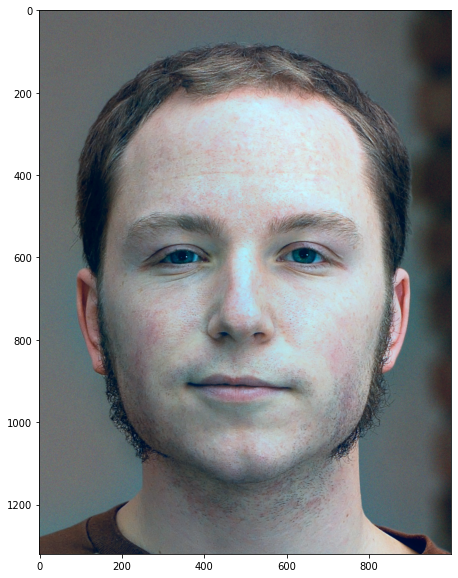

In [5]:
inputImg_transformed_u8 = inputImg_transformed.astype('uint8')
inputImg_transformed_u8_rgb = cv2.cvtColor(inputImg_transformed_u8.copy(), cv2.COLOR_Lab2RGB)
plt.figure(figsize=(10,10))
plt.imshow(inputImg_transformed_u8_rgb, vmin=0, vmax=255)

In [6]:
# plt.imshow(recImg)
# np.min(inputImg_transformed[:,:,0]), np.max(inputImg_transformed[:,:,0])
# np.min(inputImg_transformed[:,:,1]), np.max(inputImg_transformed[:,:,1])
# np.min(inputImg_transformed[:,:,2]), np.max(inputImg_transformed[:,:,2])

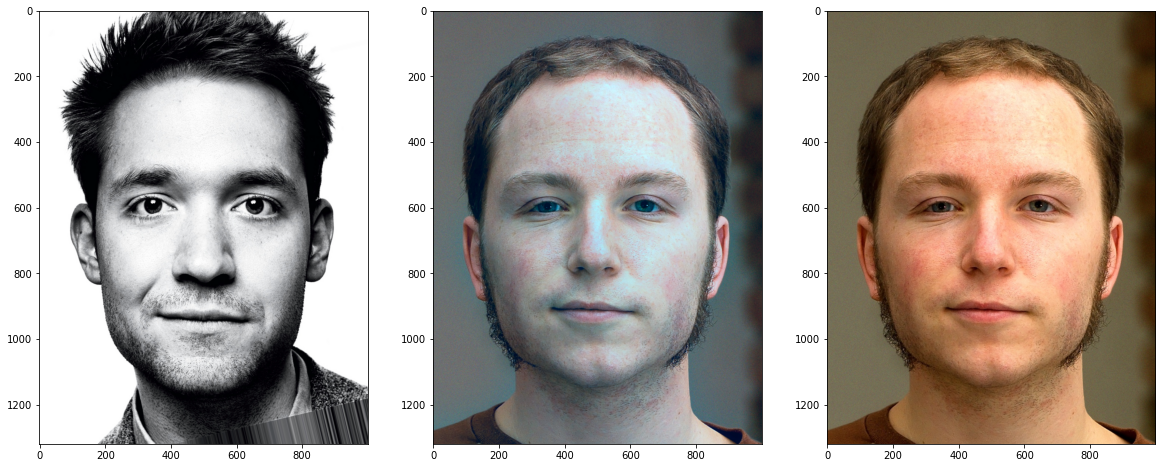

In [7]:
refImgrgb=cv2.cvtColor(refImg.astype(np.uint8),cv2.COLOR_Lab2RGB)
inputImgrgb=cv2.cvtColor(inputImg.astype(np.uint8),cv2.COLOR_Lab2RGB)
#refImg=np.float32(cv2.cvtColorefImg, cv2.COLOR_BGR2Lab))
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb)
fig.add_subplot(1, 3, 2)
# plt.imshow(recrgb)
plt.imshow(inputImg_transformed_u8_rgb)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb)